# Random Signals and LTI-Systems

*This jupyter/Python notebook is part of a [collection of notebooks](../index.ipynb) in the masters module [Digital Signal Processing](http://www.int.uni-rostock.de/Digitale-Signalverarbeitung.48.0.html), Comunications Engineering, Universität Rostock. Please direct questions and suggestions to <mailto:Sascha.Spors@uni-rostock.de>.*

## Linear Mean

In the following we aim at finding a relation between the linear mean $\mu_x[k]$ of the input signal $x[k]$ and the linear mean $\mu_y[k]$ of the output signal $y[k] = \mathcal{H} \{ x[k] \}$ of an LTI system.

### Non-Stationary Process

Let's first impose no restrictions in terms of stationarity to the input signal. The [linear mean](../random_signals/ensemble_averages.ipynb#Linear-mean) of the output signal is then given as

$$ \mu_y[k] = E\{ y[k] \} = E\{ x[k] * h[k] \} $$

where $h[k]$ denotes the impulse response of the system. Since the convolution and the ensemble average are linear operations, and $h[k]$ is a deterministic signal this can be rewritten as

$$ \mu_y[k] = \mu_x[k] * h[k] $$

Hence, the linear mean of the output signal $\mu_y[k]$ is given as the convolution of the linear mean of the input signal $\mu_x[k]$ with the impulse response $h[k]$ of the system.

#### Example

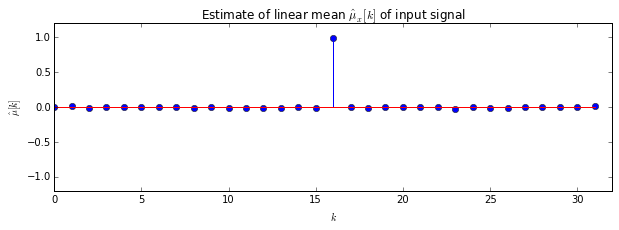

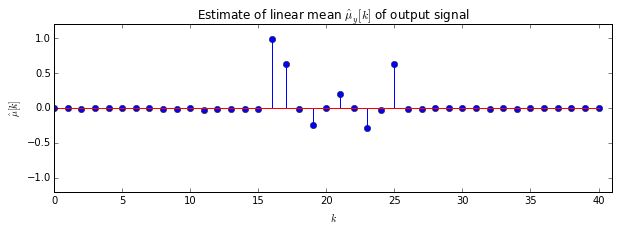

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

L = 32  # number of random samples
N = 10000  # number of sample functions

# generate input signal (white Gaussian noise)
x = np.random.normal(size=(N, L))
x[:, L//2] += 1 
# generate output signal
h = 2*np.fft.irfft([1,1,1,0,0,0])
y = np.asarray([np.convolve(x[n,:], h, mode='full') for n in range(N)])

# compute and plot results
def compute_plot_results(x):

    # estimate linear mean by ensemble average
    mu = 1/N * np.sum(x, 0)
    # plot linear mean
    plt.stem(mu)
    plt.xlabel(r'$k$')
    plt.ylabel(r'$\hat{\mu}[k]$')
    plt.axis([0, x.shape[1], -1.2, 1.2])

plt.figure(figsize = (10, 3))
plt.title(r'Estimate of linear mean $\hat{\mu}_x[k]$ of input signal')
compute_plot_results(x)

plt.figure(figsize = (10, 3))
plt.title(r'Estimate of linear mean $\hat{\mu}_y[k]$ of output signal')
compute_plot_results(y)

**Exercise**

* Can you estimate the impulse response $h[k]$ of the system from above plots of $\hat{\mu}_x[k]$ and $\hat{\mu}_y[k]$?
* You can check your results by plotting the impulse response $h[k]$, for instance with the command `plt.stem(h)`.

### Stationary Process

For a (weakly) stationary process, the linear mean of the input signal $\mu_x[k] = \mu_x$ does not depend on the time index $k$. For a (weakly) stationary input signal, also the output signal of the system is (weakly) stationary. Using the result for the non-stationary case above yields

$$ \mu_y = \mu_x * h[k] = \mu_x \cdot H(\mathrm{e}^{\,\mathrm{j}\,\Omega}) \big\vert_{\Omega = 0} $$

where $H(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \mathcal{F}_* \{ h[k] \}$ denotes the discrete time Fourier transformation (DTFT) of the impulse response. Hence, the linear mean of a (weakly) stationary input signal is weighted by the transmission characteristics for the constant (i.e. DC, $\Omega = 0$) component of the LTI system. This implies that the output signal to a zero-mean $\mu_x = 0$ input signal is also zero-mean $\mu_y = 0$.

**Copyright**

<p xmlns:dct="http://purl.org/dc/terms/">
  <a rel="license"
     href="http://creativecommons.org/publicdomain/zero/1.0/">
    <img src="http://i.creativecommons.org/p/zero/1.0/88x31.png" style="border-style: none;" alt="CC0" />
  </a>
  <br />
  To the extent possible under law,
  <span rel="dct:publisher" resource="[_:publisher]">the person who associated CC0</span>
  with this work has waived all copyright and related or neighboring
  rights to this work.
</p>